**Андрей, привет!**

Меня зовут Артемьева Саша, я буду проверять твой проект. Приятно познакомиться, хоть и заочно:)
    
Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее.

# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.


### Цели исследования
1. Есть ли зависимость между наличием детей и возвратом кредита в срок?
2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
4. Как разные цели кредита влияют на его возврат в срок?

### Описание данных


| Название столбца       | Значение                                   |
|------------------------|--------------------------------------------|
| ***children***         | количество детей в семье                   |
| ***days_employed***    | общий трудовой стаж в днях                 |
| ***dob_years***        | возраст клиента в годах                    |
| ***education***        | уровень образования клиента                |
| ***education_id***     | идентификатор уровня образования           |
| ***family_status***    | семейное положение                         |
| ***family_status_id*** | идентификатор семейного положения          |
| ***gender***           | пол клиента                                |
| ***income_type***      | тип занятости                              |
| ***debt***             | имел ли задолженность по возврату кредитов |
| ***total_income***     | ежемесячный доход                          |
| ***purpose***          | цель кредита                               |

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>  Отлично! Увидели, с чем предстоит иметь дело

## Шаг 1. Изучаем информацию о датасете

In [62]:
# импортируем нужные библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer('russian').stem  # создаем объект SnowballStemmer
from pymystem3 import Mystem
mystem = Mystem().lemmatize # создаем объект Mystem

In [63]:
# прочитаем предоставленный датасет
data = pd.read_csv('G:\practicum_ds\module_2\data\data.csv')

# посмотрим информацию о содержании колонок
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


*После просмотра информации о колонках можно сделать следующие выводы:*
- Датасет содержит 21525 сэмплов и 12 столбцов, из них 2 столбца с данными типа float64, 5 с int64 и 5 с данными типа object.
- В столбцах days_employed и total_income присутствуют пропуски данных, причем в обоих столбцах содержится одинаковое количество строк с пропусками - 2174, что дает нам возможность предположить что между пропусками в этих столбцах есть зависимость.
- Использование int64 в столбцах children, debt и dob_years выглядит избыточным.

Давайте посмотрим на содержание датасета и описательную статистику столбцов.

In [64]:
data.head(30)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [65]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


**Из полученных данных можно сделать следующие выводы:**

1. У столбцов children, dob_years, education_id, family_status_id, debt максимальные значения никогда не превысят int64, так что можем смело конвертировать их в int8 сэкономив память.
2. В столбце children минимальное значение равно -1, что явно говорит о наличии недостоверных/ошибочных данных в данном столбце.
3. Столбец days_employed выглядит довольно странно, очень много отрицательных и слишком больших значений.
4. В столбце education необходимо привести данные к нижнему регистру для дальнейшего удобства работы с ними

## Шаг2: Предобработка данных

### Преобразование типов данных

Для начала преобразуем типы данных для экономии памяти.
Для наглядности создадим датафрейм, содержащий информацию об исходном датасете и датасете с преобразованными типами данных.

In [66]:
data_compressed = data.astype({'children': 'int8', 'days_employed': 'float32', 'dob_years': 'int8', 'education_id': 'int8', 'family_status_id': 'int8', 'debt': 'int8', 'total_income': 'float32'})
pd.DataFrame(data=[
    data.memory_usage(),
    data_compressed.memory_usage(),
    data.memory_usage() - data_compressed.memory_usage(),
    100 / (data.memory_usage() / (data.memory_usage() - data_compressed.memory_usage()))
    ]
).rename({0: 'before_optimization', 1: 'after_optimization', 2: 'compressed_bytes', 3: '%_compress'})

,Index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
before_optimization,128.0,172200.0,172200.0,172200.0,172200.0,172200.0,172200.0,172200.0,172200.0,172200.0,172200.0,172200.0,172200.0
after_optimization,128.0,21525.0,86100.0,21525.0,172200.0,21525.0,172200.0,21525.0,172200.0,172200.0,21525.0,86100.0,172200.0
compressed_bytes,0.0,150675.0,86100.0,150675.0,0.0,150675.0,0.0,150675.0,0.0,0.0,150675.0,86100.0,0.0
%_compress,0.0,87.5,50.0,87.5,0.0,87.5,0.0,87.5,0.0,0.0,87.5,50.0,0.0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>  Отличное преобразование данных в одну строку!

Простым преобразованием типов данных удалось уменьшить потребление памяти от 50% до 87.5%.

In [67]:
data_compressed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int8   
 1   days_employed     19351 non-null  float32
 2   dob_years         21525 non-null  int8   
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int8   
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int8   
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int8   
 10  total_income      19351 non-null  float32
 11  purpose           21525 non-null  object 
dtypes: float32(2), int8(5), object(5)
memory usage: 1.1+ MB


Теперь датасет использует 1.1+ MB памяти вместо 2+ MB.
Далее будем использовать "сжатый" датасет.

In [68]:
data = data_compressed

### Приведение строковых данных к нижнему регистру

Приведем данные в столбцах education и family_status к нижнему регистру для дальнейшего удоства работы с ними.

In [69]:
data['education'] = data['education'].apply(lambda x: x.lower())
data['family_status'] = data['family_status'].apply(lambda x: x.lower())
# проверяем что код отработал корректно
data[['education', 'family_status']].value_counts()

education            family_status        
среднее              женат / замужем          8848
высшее               женат / замужем          3046
среднее              гражданский брак         2999
                     не женат / не замужем    1779
высшее               гражданский брак          956
среднее              в разводе                 827
высшее               не женат / не замужем     806
среднее              вдовец / вдова            780
неоконченное высшее  женат / замужем           341
высшее               в разводе                 316
неоконченное высшее  не женат / не замужем     193
                     гражданский брак          166
начальное            женат / замужем           141
высшее               вдовец / вдова            136
начальное            гражданский брак           56
                     не женат / не замужем      34
неоконченное высшее  в разводе                  31
начальное            вдовец / вдова             31
                     в разводе         

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>  Молодец!

### Лемматизация/стемминг

Лемматизируем/применим стемминг для данных из колонки purpose для дальнейшего удобства работы с ними.

In [70]:
# т.к. функция лемматизации на моем компьютере почему-то будет выполняться около 1.5 дней (5.5 сек на итерацию),
# а на моей VPS mystem вообще не работает из-за aarch64 архитектуры, и проект я случайно уже загрузил на практикуме
# и поэтому у меня больше недоступен ноутбук практикума я буду использовать стемминг, т.к. он выполняется за ~1.5 секунды

# data['purpose'].head().apply(lambda x: mystem(x))
data['purpose'] = data['purpose'].apply(lambda x: snowball_stemmer(x))
# проверим что функция отработала корректно
data['purpose'].head(10)

0                 покупка жил
1      приобретение автомобил
2                 покупка жил
3    дополнительное образован
4              сыграть свадьб
5                 покупка жил
6              операции с жил
7                   образован
8        на проведение свадьб
9       покупка жилья для сем
Name: purpose, dtype: object

### Определение типа ошибки

Ранее мы обнаружили пропуски в столбцах days_employed и total_income, давайте рассмотрим их поподробнее.
Учитывая что количество пропусков в столбцах одинаково, можно предположить что между ними есть зависимость и в строке,
где пропущено значение столбца days_employed, также пропущено значение столбца total_income.
Чтобы в этом убедиться выберем все строки, где пропущенны значения в обоих столбцах. Количество строк должно быть равно 2174.
Если будет больше, значит значения пропущены в разных строчках.
Давайте проверим это.


In [71]:

data.query('days_employed.isna() and total_income.isna()').children.count()


2174

Действительно между пропусками в столбцах days_employed и total_income есть прямая зависимость.
Теперь необходимо узнать, к какому типу пропусков относятся наши данные.
Для этого выберем все строки с пропущенными значениями в одном или двух столбцах и проверим встречаются ли пропуске в каком-то одном классе, или нет.
Для наглядности создадим для этого датафрейм и выведем его на экран.

In [72]:
# список колонок по которым будем проводить анализ
columns = ['family_status', 'debt', 'income_type', 'gender', 'education', 'dob_years']
# создаем датафрейм, состоящий из строк с пропущенными значениями в колонках
empty_data = data.query('days_employed.isna() and total_income.isna()')

# считаем количество пропущенных значений для каждой анализируемой колонки
for column in columns:
    display(f"{'='*40} Column: {column} {'='*40}")
    display(
        pd.DataFrame(
            data=[
                empty_data[column].value_counts()
            ]
        ).rename({column: 'Количество пропущенных значений'}))

'======================================== Column: family_status ========================================'

,женат / замужем,гражданский брак,не женат / не замужем,в разводе,вдовец / вдова
Количество пропущенных значений,1237,442,288,112,95


'======================================== Column: debt ========================================'

,0,1
Количество пропущенных значений,2004,170


'======================================== Column: income_type ========================================'

,сотрудник,компаньон,пенсионер,госслужащий,предприниматель
Количество пропущенных значений,1105,508,413,147,1


'======================================== Column: gender ========================================'

,F,M
Количество пропущенных значений,1484,690


'======================================== Column: education ========================================'

,среднее,высшее,неоконченное высшее,начальное
Количество пропущенных значений,1540,544,69,21


'======================================== Column: dob_years ========================================'

,34,40,42,31,35,36,47,41,30,28,...,67,0,68,71,69,20,70,72,19,73
Количество пропущенных значений,69,66,65,65,64,63,59,59,58,57,...,16,10,9,5,5,5,3,2,1,1


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>  Можем сообщить о проблеме заказчику и запросить метаданные для более глубокого анализа

*Из полученных данных мы можем сделать следующий вывод:*
Мы имеем дело со случайной ошибкой т.к. есть зависимость между пропусками в колонках days_employed и total_income, но нет зависимости от значений собственного столбца.

## Заполнение пропусков

Для начала займемся пропусками столбца total_income.
Наиболее точно можно заполнить пропуски медианной зарплатой для датафрейма (не берем среднюю дабы исключить слишком высокие и низкие значения), сгруппированного по типу занятости, гендеру и образованию.
В случае, если ежемесячный доход не зависит от гендера, его можно будет исключить из группировки и посчитать медиану только по типу занятости и образованию.

In [73]:
data.groupby(['income_type', 'gender', 'education'])['total_income'].median()

income_type      gender  education          
безработный      F       высшее                 202722.515625
                 M       среднее                 59956.992188
в декрете        F       среднее                 53829.128906
госслужащий      F       высшее                 157841.437500
                         начальное               89618.968750
                         неоконченное высшее    136599.125000
                         среднее                125831.812500
                         ученая степень         111392.234375
                 M       высшее                 214706.640625
                         начальное              190966.656250
                         неоконченное высшее    177320.625000
                         среднее                169651.953125
компаньон        F       высшее                 189893.468750
                         начальное              134012.000000
                         неоконченное высшее    170471.625000
                         

Как можем убедиться во всех группах, кроме пенсионеров, ежемесячный доход порой значительно зависит от гендера.
Так что оставляем группировку по гендеру и заполняем пропущенные значения медианным значением.
Но у нас есть один мужчина предприниматель с высшим образованием, медиану ежемесечного дохода которого нельзя посчитать из-за нехватки данных.
Предположим что в предпринимательстве нет зависимости ежемесячного дохода от гендера, так что возьмем для него медианную ежемесячнаую зарплату
девушек предпринимателей с таким же образованием.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>  Верное решение

In [74]:
# присваиваем медианную зарплату вместо пропущенных значений
data['total_income'] = data['total_income'].fillna(data.groupby(['income_type', 'gender', 'education'])['total_income'].transform('median'))
# присваиваем медианную зарплату оставшемуся предпринимателю
data.loc[data['total_income'].isna(), 'total_income'] = 499163.156250
# убедимся что пропущенных значений в столбце total_income больше нет
data.query('total_income.isna()').count()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Теперь разберемся с данными в столбце days_employed.
В данном столбце содержится информация об общем трудовом стаже в днях.

In [75]:
data['days_employed'].describe()

count     19351.000000
mean      63046.500000
std      140827.312500
min      -18388.949219
25%       -2747.423584
50%       -1203.369507
75%        -291.095947
max      401755.406250
Name: days_employed, dtype: float64

С данными явно что-то не так. Большинство данных имеют отрицательные значения и явно выражены не в днях.
Предположим, что данные из этого столбца надо взять по модулю и выражены они не в днях, а в часах, т.о. нужно поделить значения на количество часов в сутках, т.е. 24 и привести к типу int.

In [76]:
data['days_employed'] = data['days_employed'].abs() / 24
data['days_employed'].describe()

count    19351.000000
mean      2788.113770
std       5792.953125
min          1.005901
25%         38.625389
50%         91.425850
75%        230.745117
max      16739.808594
Name: days_employed, dtype: float64

Так-то лучше. В среднем трудовой стаж составляет почти 16 лет.
Попробуем сгруппировать данные таким же способом, как и для ежемесячного дохода и посчитаем среднее значение и медиану.

In [77]:
display(data.groupby(['income_type', 'education', 'gender'])['days_employed'].agg(['mean', 'median']))

mean        median
income_type     education           gender                            
безработный     высшее              F       16470.951172  16470.951172
                среднее             M       14063.519531  14063.519531
в декрете       среднее             F         137.365005    137.365005
госслужащий     высшее              F         130.401321    103.482384
                                    M         138.705338    118.150208
                начальное           F         116.156967    116.156967
                                    M         159.660980    103.221245
                неоконченное высшее F          84.497902     66.277603
                                    M         102.606949     91.148842
                среднее             F         159.308655    121.987930
                                    M         123.563889    110.303459
                ученая степень      F         248.669815    248.669815
компаньон       высшее              F          87.514641     64.066505
                                    M          77.895767     55.325890
                начальное           F          68.617905     47.984768
                                    M          96.747955     44.804893
                неоконченное высшее F          58.816292     39.749382
                                    M          58.561928     43.355705
                                    XNA        98.275024     98.275024
                среднее             F          95.963615     71.088799
                                    M          88.601364     66.923569
пенсионер       высшее              F       15226.232422  15287.700195
                                    M       15183.691406  15205.101562
                начальное           F       15180.256836  15114.474609
                                    M       14764.654297  14588.167969
                неоконченное высшее F       15434.403320  15542.330078
                                    M       15250.538086  14974.473633
                среднее             F       15222.865234  15247.142578
                                    M       15140.629883  15072.836914
                ученая степень      F       15678.175781  15678.175781
                                    M       14066.034180  14066.034180
предприниматель высшее              F          21.702003     21.702003
                                    M                NaN           NaN
сотрудник       высшее              F         100.535187     68.166092
                                    M          82.662292     55.489563
                начальное           F          94.826157     60.529099
                                    M          63.229855     43.201439
                неоконченное высшее F          65.866608     47.443508
                                    M          66.872139     51.735100
                среднее             F         108.452682     73.761307
                                    M          85.713867     57.634796
                ученая степень      M         112.675972     97.976326
студент         высшее              M          24.114647     24.114647

Видим, что тип занятости, образование и гендер также влияют трудовой стаж, но на пенсионеров меньше всего.
Между средним и медианными есть разница, но пропорционально разница значений не сильно отличается.
Чтобы выбрать, какими данными заполнить пропущенные значения с минимальной ошибкой, посмотрим на среднеквадратичное отклонение по каждой из функций.

In [78]:
display(f"СКО среднего значения группировки: {data.groupby(['income_type', 'education', 'gender'])['days_employed'].agg(['mean', 'median'])['mean'].describe()['std']}")
display(f"СКО медианного значения группировки: {data.groupby(['income_type', 'education', 'gender'])['days_employed'].agg(['mean', 'median'])['median'].describe()['std']}")


'СКО среднего значения группировки: 6885.7490234375'

'СКО медианного значения группировки: 6881.36767578125'

СКО среднего и медианного значений незначительно отличается, но у медианы чуть меньше отклонение, так что заполним значения медианой.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>  Молодец, что сравнил и среднее, и медиану. В наших данных не так много выбросов, так что оба метода пододят для заполнения. Но медиана предпочтительнее

In [79]:
data['days_employed'] = data.groupby(['income_type', 'education', 'gender'])['days_employed'].transform('median')
# для мужчины предпринимателя возьмем данные женщин предпринимателей с тем же образованием
data.loc[data['days_employed'].isna(), 'days_employed'] = 21.702003
# убедимся что все пропуски заполнены
data.query('days_employed.isna()').count()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Ранее мы обнаружили отрицательные значение в столбце children. Давайте посмотрим количество таких записей.

In [80]:
display(f"Количество записей с отрицательным значением в столбце children: {len(data[data['children'] < 0])}")

'Количество записей с отрицательным значением в столбце children: 47'

47 записей с отрицательным значением. Похоже на баг. Удостоверимся, что он имеет случайный характер. Если нет, то будет что передать разработчикам.

In [81]:
# список колонок по которым будем проводить анализ
columns = ['family_status', 'debt', 'income_type', 'gender', 'education', 'dob_years']
# создаем датафрейм, состоящий из строк с пропущенными значениями в колонках
empty_data = data[data['children'] < 0]

# считаем количество пропущенных значений для каждой анализируемой колонки
for column in columns:
    display(f"{'='*40} Column: {column} {'='*40}")
    display(
        pd.DataFrame(
            data=[
                empty_data[column].value_counts()
            ]
        ).rename({column: 'Количество пропущенных значений'}))

'======================================== Column: family_status ========================================'

,женат / замужем,гражданский брак,не женат / не замужем,в разводе,вдовец / вдова
Количество пропущенных значений,29,5,5,4,4


'======================================== Column: debt ========================================'

,0,1
Количество пропущенных значений,46,1


'======================================== Column: income_type ========================================'

,сотрудник,компаньон,пенсионер,госслужащий
Количество пропущенных значений,26,9,8,4


'======================================== Column: gender ========================================'

,F,M
Количество пропущенных значений,35,12


'======================================== Column: education ========================================'

,среднее,высшее,неоконченное высшее
Количество пропущенных значений,37,9,1


'======================================== Column: dob_years ========================================'

,46,34,40,37,28,31,50,44,32,41,...,53,59,63,35,51,48,64,26,55,69
Количество пропущенных значений,3,3,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1


Ошибка имеет случайный характер и не зависит от собственных значений столбца.
Предположим что -1 означает наличие одного ребенка. Исправим это.

<div class="alert alert-info"> <b>Комментарий студента:</b>
Пока закомментировал данный блок, чтобы дальнейшее исследование было возможным, приведу данные к абсолютным значениям далее.
</div>

In [82]:
#data['children'] = data['children'].abs()
# удостоверимся что ошибка исправлена
#data['children'].describe()

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Сейчас доля аномалий мала и ни на что не повлияет. В следующий раз старайся сразу высчитывать их долю и если она меньше 5%, смело избавляйся от нее. Возможно наше предположение о том, что -1==1 неверно

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b>
Чтобы попробовать развеять сомнения в правильности такого решения, давай попристальнее посмотрим на людей, у которых в данных ошибка :)
</div>

<AxesSubplot:xlabel='family_status'>

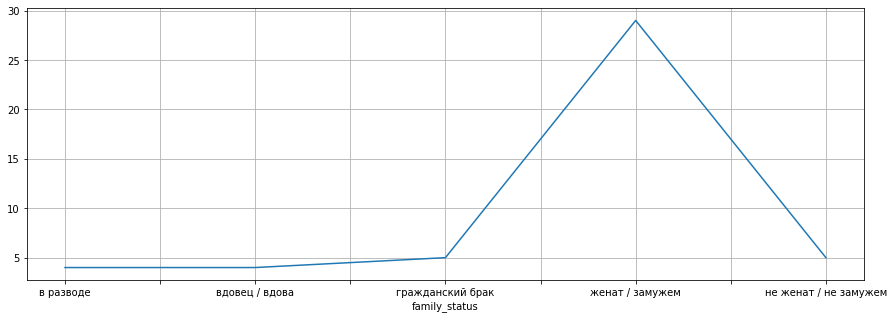

In [83]:
# сеймейное положение людей, у которых в данных указано количество детей -1
display(data.query("children == -1").groupby('family_status')['children'].count().plot(figsize=(15, 5), grid=True))

<div class="alert alert-info"> <b>Комментарий студента:</b>
Почти все люди состоят в браке, или уже состояли. 5 человек не в браке, но дети могут быть приемными.
</div>

<AxesSubplot:xlabel='dob_years'>

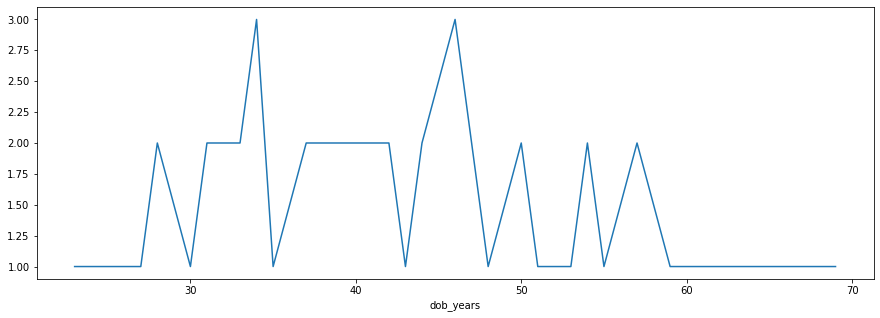

In [84]:
# возраст людей, у которых в данных указано количество детей -1
display(data.query("children == -1 and dob_years > 0").groupby('dob_years')['dob_years'].count().plot(figsize=(15, 5)))

<div class="alert alert-info"> <b>Комментарий студента:</b>
Да и возраст этих людей уже вполне позволяет стать родителями :) Но даже учитывая эти факторы, кому-то может быть нравится жить для себя... Проверим как это коррелирует с людьми у которых нет детей.
</div>

<AxesSubplot:xlabel='family_status'>

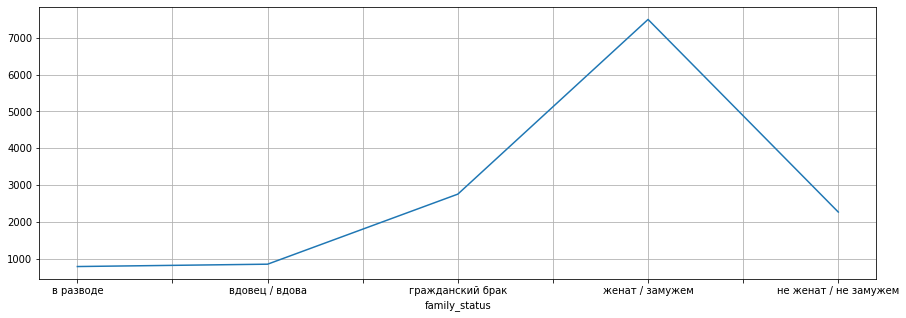

In [85]:
# сеймейное положение людей, у которых в данных указано количество детей 1
display(data.query("children == 0").groupby('family_status')['children'].count().plot(figsize=(15, 5), grid=True))

<div class="alert alert-info"> <b>Комментарий студента:</b>
Большинство тоже состоят в браке, но может быть они еще слишком молоды для детей?
</div>

<AxesSubplot:xlabel='dob_years'>

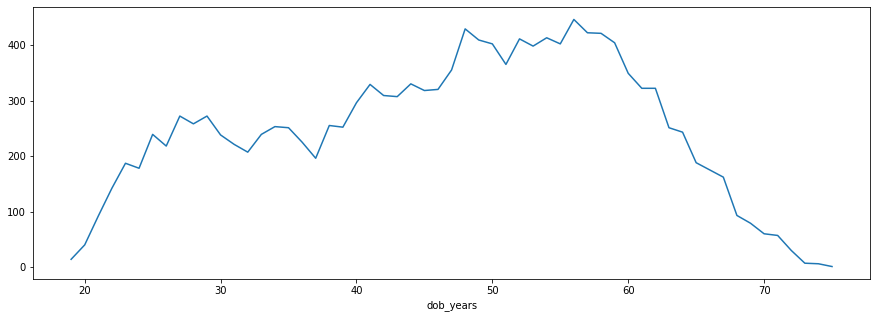

In [86]:
# возраст людей, у которых в данных указано количество детей 1
display(data.query("children == 0 and dob_years > 0").groupby('dob_years')['dob_years'].count().plot(figsize=(15, 5)))

<div class="alert alert-info"> <b>Комментарий студента:</b>
Увы, но нет. Кажется от ошибочных данных и правда лучше избавиться, ведь достоверно восстановить в них справедливость у нас кажется не выйдет, а данных и правда не так много.
</div>

In [87]:
# привожу данные к абсолютным значениям
data['children'] = data['children'].abs()
# удостоверимся что ошибка исправлена
data['children'].describe()

count    21525.000000
mean         0.543275
std          1.379876
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> Куда ты отнесешь кол-во детей в 20 штук? Можно ли считать это значение также аномальным? </div>

<div class="alert alert-info"> <b>Комментарий студента:</b>
Согласен, выглядят такие данные очень странно, но я всегда стараюсь бороться за каждую запись в данных :)
Посмотрим на многодетных чуть подробнее.
</div>

<AxesSubplot:xlabel='family_status'>

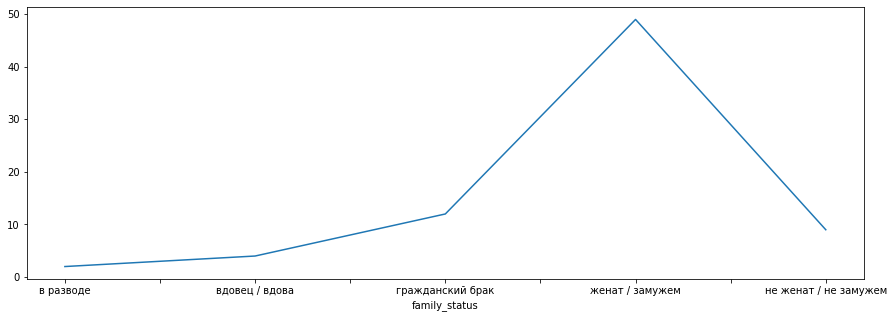

In [88]:
# семейное положение людей с 20 детьми
display(data.query("children == 20").groupby('family_status')['children'].count().plot(figsize=(15, 5)))

<div class="alert alert-info"> <b>Комментарий студента:</b>
Большинство людей состоят в браке или уже состояли, а у одиночек дети могут быть и приемные. Вот были бы у нас еще данные о родстве...
</div>

<AxesSubplot:xlabel='dob_years'>

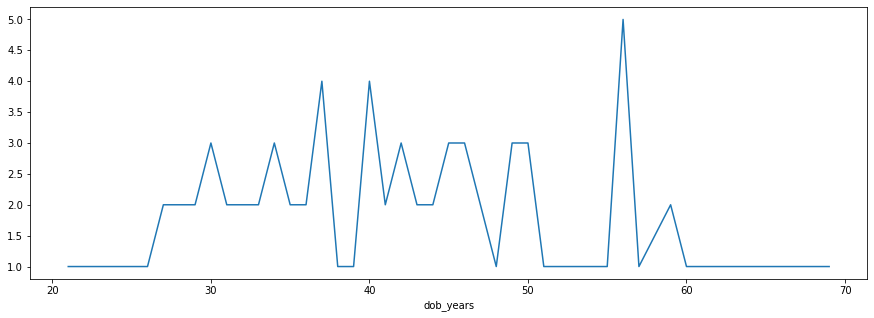

In [89]:
# возраст людей с 20 детьми
display(data.query("children == 20 and dob_years > 0").groupby('dob_years')['dob_years'].count().plot(figsize=(15, 5)))

<div class="alert alert-info"> <b>Комментарий студента:</b>
Большинству людей с 20 детьми уже далеко за 30. Мне кажется наличие такого небольшого количества людей с 20 детьми вполне может быть правдой. Но я бы уточнил этот момент у заказчика :)
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> Что можно еще сказать об аномальных значениях? Они могут скрываться в любой колонке датафрейма, поэтому важно изучить каждый столбец.  </div>

<div class="alert alert-info"> <b>Комментарий студента:</b>
В данных виднелась одна запись со странным XNA гендером.
</div>

In [90]:
# посмотрим возможные значения гендеров в данных
data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [91]:
# что ты такое
data[data['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,98.275024,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.15625,покупка недвижим


<div class="alert alert-info"> <b>Комментарий студента:</b>
Сначала я подумал что это может быть кто-то из США, там таким, как оказывается, балуются (ПРУФЫ - https://www.bbc.com/russian/news-59075409)
Но тому уже минимум 66 лет, а у нас в данных 24 года. Т.к. это всего одна запись, мы безболезненно можем от нее избавиться.
</div>

In [92]:
# удаляем запись с ошибкой
data.drop(data[data['gender'] == 'XNA'].index, inplace=True)

### Поиск и удаление дубликатов

Узнаем количество явных дублей в датасете

In [93]:
len(data[data.duplicated()])

71

В датасете 71 явный дубль. Удалим их.

In [94]:
data = data.drop_duplicates()

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Удалять дубли можно только после полной обработки данных. Верно! </div>


### Категоризация данных

Создадим категории по возрасту, на основании категоризации ВОЗ:
1. Несовершеннолетние - до 18 лет
2. Молодые люди - от 18 до 44 лет
3. Люди среднего возраста - 45-59 лет
4. Люди пожилого возраста - 60-74 лет
5. Старые люди - 75-90 лет
6. Долгожители – старше 90 лет

Также категоризуем по уровню дохода:
1. Низкий доход - до 50 000р
2. Средний доход - до 100 000р
3. Высокий доход - до 150 000р
4. Очень высокий доход - более 150 000р

И наконец категоризуем по целям кредита. Категории будем брать из лемм/стеммов.

Перед этим проверим какие данные у нас содержатся в данном столбце.

In [95]:
data['dob_years'].describe()

count    21453.000000
mean        43.272130
std         12.570427
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

Средний возраст аудитории 43 года. Но у нас минимальное значение равно 0. Посмотрим сколько таких записей есть в датасете.

In [96]:
display(f"Количество записей с 0 возрастом: {len(data[data['dob_years'] == 0])}")
display(data[data['dob_years'] == 0])

'Количество записей с 0 возрастом: 101'

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,15247.142578,0,среднее,1,женат / замужем,0,F,пенсионер,0,71291.523438,автомобил
149,0,73.761307,0,среднее,1,в разводе,3,F,сотрудник,0,70176.437500,операции с жил
270,3,73.761307,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.460938,ремонт жил
578,0,15247.142578,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687500,строительство собственной недвижим
1040,0,64.066505,0,высшее,0,в разводе,3,F,компаньон,0,303994.125000,свой автомобил
...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,73.761307,0,среднее,1,женат / замужем,0,F,сотрудник,0,124127.093750,жил
20462,0,15247.142578,0,среднее,1,женат / замужем,0,F,пенсионер,0,259193.921875,покупка своего жил
20577,0,15247.142578,0,среднее,1,не женат / не замужем,4,F,пенсионер,0,129788.765625,недвижим
21179,2,55.325890,0,высшее,0,женат / замужем,0,M,компаньон,0,240702.000000,строительство жилой недвижим


Мы нашли 101 запись с 0 возрастом в датасете. Похоже на какой-то баг. Рассмотрим есть ли в этом какая-то закономерность, чтобы можно было сообщить кому следует и они поправили багу.

In [97]:
# список колонок по которым будем проводить анализ
columns = ['family_status', 'debt', 'income_type', 'gender', 'education']
# создаем датафрейм, состоящий из строк с нулевыми значениями в колонке с возрастом
empty_data = data[data['dob_years'] == 0]

# считаем количество нулевых значений для каждой анализируемой колонки
for column in columns:
    display(f"{'='*40} Column: {column} {'='*40}")
    display(
        pd.DataFrame(
            data=[
                empty_data[column].value_counts()
            ]
        ).rename({column: 'Количество пропущенных значений'}))

'======================================== Column: family_status ========================================'

,женат / замужем,гражданский брак,не женат / не замужем,в разводе,вдовец / вдова
Количество пропущенных значений,49,21,16,10,5


'======================================== Column: debt ========================================'

,0,1
Количество пропущенных значений,93,8


'======================================== Column: income_type ========================================'

,сотрудник,пенсионер,компаньон,госслужащий
Количество пропущенных значений,55,20,20,6


'======================================== Column: gender ========================================'

,F,M
Количество пропущенных значений,72,29


'======================================== Column: education ========================================'

,среднее,высшее,неоконченное высшее
Количество пропущенных значений,64,35,2


Закономерности выявить не удалось, во всех исследуемых колонках присутствуют нулевые значения возраста.
Учтем наличие таких данных в дальнейшей работе.

In [98]:
# функция категоризации по возрасту
def yong_categorise(row):
    years = row['dob_years']

    if 1 <= years <= 17:
        return 'несовершеннолетние'

    elif 18 <= years <= 44:
        return 'молодые_люди'

    elif 45 <= years <= 59:
        return 'средний_возраст'

    elif 60 <= years <= 74:
        return 'пожилой_возраст'

    elif 75 <= years <= 90:
        return 'старые_люди'

    elif years > 90:
        return 'долгожители'

    else:
        return 'нет_данных'


def income_categorise(row):
    income = row['total_income']

    if income <= 50000:
        return 'низкий_доход'

    elif 50001 <= income <= 100000:
        return 'средний_доход'

    elif 100001 <= income <= 150000:
        return 'высокий_доход'

    elif income >= 150001:
        return 'очень_высокий_доход'

# категоризируем людей по возрасту
data['yong_status'] = data.apply(yong_categorise, axis=1)

# категоризируем людей по доходу
data['income_status'] = data.apply(income_categorise, axis=1)

# убедимся что код отработал корректно
data.head(10)

C:\Users\A4F7~1\AppData\Local\Temp/ipykernel_3188/3199470586.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['yong_status'] = data.apply(yong_categorise, axis=1)
C:\Users\A4F7~1\AppData\Local\Temp/ipykernel_3188/3199470586.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['income_status'] = data.apply(income_categorise, axis=1)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,yong_status,income_status
0,1,68.166092,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.640625,покупка жил,молодые_люди,очень_высокий_доход
1,1,73.761307,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.015625,приобретение автомобил,молодые_люди,высокий_доход
2,0,57.634796,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.953125,покупка жил,молодые_люди,высокий_доход
3,3,57.634796,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.562500,дополнительное образован,молодые_люди,очень_высокий_доход
4,0,15247.142578,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.078125,сыграть свадьб,средний_возраст,очень_высокий_доход
5,0,55.325890,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.562500,покупка жил,молодые_люди,очень_высокий_доход
6,0,64.066505,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.968750,операции с жил,молодые_люди,очень_высокий_доход
7,0,57.634796,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823.937500,образован,средний_возраст,высокий_доход
8,2,68.166092,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856.835938,на проведение свадьб,молодые_люди,средний_доход
9,0,57.634796,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.937500,покупка жилья для сем,молодые_люди,высокий_доход


Для категоризации по целям кредита сначала посмотрим на какие цели клиенты берут кредиты.

In [99]:
data['purpose'].value_counts()

свадьб                                 791
на проведение свадьб                   768
сыграть свадьб                         765
операции с недвижим                    675
покупка коммерческой недвижим          661
операции с жил                         652
покупка жилья для сдач                 651
операции с коммерческой недвижим       650
покупка жил                            646
жил                                    646
покупка жилья для сем                  638
строительство собственной недвижим     635
недвижим                               633
операции со своей недвижим             627
строительство жилой недвижим           624
покупка недвижим                       620
покупка своего жил                     620
строительство недвижим                 619
ремонт жил                             607
покупка жилой недвижим                 606
на покупку своего автомобил            505
заняться высшим образован              496
автомобил                              494
сделка с по

Из полученных данных мы можем выделить следующие категории:
1. Свадьба
2. Покупка/строительство собственного жилья/недвижимости
3. Покупка коммерческой недвижимости
4. Ремонт жилья
5. На образование
6. Покупка автомобиля

Напишем соответствующую функцию категоризации.

In [100]:
# функция категоризации по цели кредита
def purpose_categorise(row):
    purpouse = row['purpose']

    if 'свадьб' in purpouse:
        return 'свадьба'

    elif 'жил' in purpouse or 'недвижим' in purpouse:
        if 'коммерческой' in purpouse:
            return 'коммерция'
        return 'жилье'

    elif 'ремонт' in purpouse:
        return 'ремонт'

    elif 'образован' in purpouse:
        return 'образование'

    elif 'автомоб' in purpouse:
        return 'авто'

    else: return 'не_определено'

# категоризируем клиентов по цели кредита
data['purpose_status'] = data.apply(purpose_categorise, axis=1)

# проверим что код отработал корректно
data.head(10)


C:\Users\A4F7~1\AppData\Local\Temp/ipykernel_3188/3860562458.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['purpose_status'] = data.apply(purpose_categorise, axis=1)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,yong_status,income_status,purpose_status
0,1,68.166092,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.640625,покупка жил,молодые_люди,очень_высокий_доход,жилье
1,1,73.761307,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.015625,приобретение автомобил,молодые_люди,высокий_доход,авто
2,0,57.634796,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.953125,покупка жил,молодые_люди,высокий_доход,жилье
3,3,57.634796,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.562500,дополнительное образован,молодые_люди,очень_высокий_доход,образование
4,0,15247.142578,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.078125,сыграть свадьб,средний_возраст,очень_высокий_доход,свадьба
5,0,55.325890,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.562500,покупка жил,молодые_люди,очень_высокий_доход,жилье
6,0,64.066505,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.968750,операции с жил,молодые_люди,очень_высокий_доход,жилье
7,0,57.634796,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823.937500,образован,средний_возраст,высокий_доход,образование
8,2,68.166092,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856.835938,на проведение свадьб,молодые_люди,средний_доход,свадьба
9,0,57.634796,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.937500,покупка жилья для сем,молодые_люди,высокий_доход,жилье


In [101]:
# убедимся, что категоризировали всех клиентов
display(f"Количестно не категоризированных клиентов: {len(data[data['purpose_status'] == 'не_определено'])}")

'Количестно не категоризированных клиентов: 0'

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Проведена качественная работа по категоризации данных </div>


## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [102]:
children_table = data.pivot_table(index='children', columns='debt', values='days_employed', aggfunc='count')
children_table['percent_1'] = children_table[1] / (children_table[1] + children_table[0]) * 100
children_table

debt,0,1,percent_1
children,,,
0,13027.0,1063.0,7.544358
1,4410.0,445.0,9.165808
2,1858.0,194.0,9.454191
3,303.0,27.0,8.181818
4,37.0,4.0,9.756098
5,9.0,NaN,NaN
20,68.0,8.0,10.526316


**Вывод**
Т.к. независимо от количества детей процент возврата кредита в срок не сильно изменяется, можно сделать вывод о том, что возврат кредита в срок не зависит от количества детей.
Но у клиентов без детей, значительно больше выплаченных в срок кредитов, чем у других.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Верно </div>
 

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [103]:
family_status = data.pivot_table(index='family_status', columns='debt', values='days_employed', aggfunc='count')
family_status['percent_1'] = family_status[1] / (family_status[1] + family_status[0]) * 100
family_status

debt,0,1,percent_1
family_status,,,
в разводе,1110,85,7.112971
вдовец / вдова,896,63,6.569343
гражданский брак,3762,388,9.349398
женат / замужем,11408,931,7.545182
не женат / не замужем,2536,274,9.750890


**Вывод**
Т.к. независимо от семейного статуса процент возврата кредита в срок не сильно изменяется, можно сделать вывод о том, что возврат кредита в срок не зависит от семейного статуса.
Но у клиентов которые находятся в браке, значительно больше выплаченных в срок кредитов, чем у других.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [104]:
income_status = data.pivot_table(index='income_status', columns='debt', values='days_employed', aggfunc='count')
income_status['percent_1'] = income_status[1] / (income_status[1] + income_status[0]) * 100
income_status

debt,0,1,percent_1
income_status,,,
высокий_доход,6261,584,8.531775
низкий_доход,349,23,6.182796
очень_высокий_доход,9340,803,7.916790
средний_доход,3762,331,8.086978


**Вывод**
Т.к. независимо от уровня дохода процент возврата кредита в срок не сильно изменяется, можно сделать вывод о том, что возврат кредита в срок не зависит от уровня дохода.
Но у клиентов с уровнем дохода более 150 000р, значительно больше выплаченных в срок кредитов, чем у других.

- Как разные цели кредита влияют на его возврат в срок?

In [105]:
purpose_status = data.pivot_table(index='purpose_status', columns='debt', values='days_employed', aggfunc='count')
purpose_status['percent_1'] = purpose_status[1] / (purpose_status[1] + purpose_status[0]) * 100
purpose_status

debt,0,1,percent_1
purpose_status,,,
авто,3903,403,9.359034
жилье,8816,683,7.190231
коммерция,1212,99,7.551487
образование,3643,370,9.220035
свадьба,2138,186,8.003442


**Вывод**
Т.к. независимо от цкли кредита процент возврата кредита в срок не сильно изменяется, можно сделать вывод о том, что возврат кредита в срок не зависит от целей кредита.
Но клиентов, вернувших в срок кредитов на жилье значительно больше, чем других.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Все так </div> 

## Шаг 4. Общий вывод

В данном проекте были проанализированы данные клиентов от кредитного отдела банка.
Основные цели данного исследования были выполнены, а именно:
1. Доказано отсутствие зависимости между наличием детей и возвратом кредита в срок.
2. Доказано отсутствие зависимости между семейным положением и возвратом кредита в срок.
3. Доказано отсутствие зависимости между дохода и возвратом кредита в срок.
4. Доказано отсутствие зависимости между целями кредита и возвратом в срок.

Кроме основных целей, также были сделаны следующие выводы:
1. У клиентов без детей, значительно больше выплаченных в срок кредитов, чем у других.
2. У клиентов которые находятся в браке, значительно больше выплаченных в срок кредитов, чем у других.
3. У клиентов с уровнем дохода более 150 000р, значительно больше выплаченных в срок кредитов, чем у других.
4. Клиентов, вернувших в срок кредитов на жилье значительно больше, чем других.

Также в датасете найдены следующие баги и недостатки:
1. Иногда встречаются отрицательные значения в стобцах children и days_employed, независимо от других значений.
2. Иногда встречаются пропуски данных в стобцах days_employed и total_income. Пропуски встречаются только в обоих столбцах одновременно и имеют случайный характер.
3. Иногда встречаются нулевые значения в столбце dob_years, независимо от других значений.
4. В столбце education и family_status значения не приведены к нижнему регистру.
5. В столбце purpose данные не лемматизированы/не произведен стемминг.

Исправление этих багов и недостатков могло бы значительно сократить время следующих исследований.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Полный отчет о проделанной работе </div> 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Спасибо за работу! Она получилась очень сильной. Ты аккуратно работаешь с данными и выносишь качественные предположения - как настоящий аналитик. Я бы хотела, чтобы мы еще немного поработали с аномалиями. Оставила направляющие комментарии. Если у тебя появятся вопросы, смело задавай их. Буду ждать твою работу на финальное ревью! </div>